# Effects of Averaging the data Pre Capacitor addition

Now we look at analyzing the signal to work out the curve.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from src.data_processing import create_data_from_entry, create_rolling_averages

%matplotlib inline
%load_ext autoreload
%autoreload 2

First we import 10 minutes (6000 ms) of data.

In [2]:
data = pd.read_csv("..\\data\\processed\\pre-capactitor-raw-data.csv", nrows=10)

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
0,4.518552,4.450329,4.418448,4.399958,4.232905,4.364889,4.349268,4.384018,4.372859,4.489223,...,4.583588,4.619294,4.657232,4.733744,4.664564,4.699314,4.683055,4.667433,4.580400,2018-09-21 16:56:48.930999994
1,4.662333,4.594428,4.530986,4.521740,4.437258,4.376048,4.420680,4.308780,4.335241,4.349268,...,4.443634,4.479021,4.523972,4.572749,4.621207,4.601122,4.675722,4.678910,4.640973,2018-09-21 16:56:49.041000128
2,4.574343,4.545651,4.414623,4.446503,4.410478,4.276900,4.364252,4.322807,4.329821,4.408565,...,4.487310,4.581038,4.601760,4.649262,4.719398,4.696445,4.677954,4.710791,4.597616,2018-09-21 16:56:49.367999792
3,4.467225,4.557128,4.540231,4.637466,4.605267,4.711109,4.667433,4.705371,4.678273,4.630452,...,4.495280,4.479658,4.398364,4.403146,4.286783,4.359789,4.301766,4.342573,4.410478,2018-09-21 16:56:49.640000105
4,4.386568,4.472645,4.553302,4.616744,4.628539,4.760205,4.666477,4.698039,4.673172,4.654681,...,4.534811,4.435664,4.408565,4.401552,4.286145,4.342892,4.349268,4.333966,4.378279,2018-09-21 16:56:49.912999868


In [4]:
data.tail()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
5,4.574343,4.529073,4.451923,4.467225,4.352775,4.401871,4.328227,4.345761,4.347036,4.426418,...,4.487629,4.596659,4.591558,4.683692,4.618975,4.711109,4.695807,4.644480,4.613875,2018-09-21 16:56:50.184999943
6,4.444271,4.478702,4.597616,4.620888,4.634916,4.747134,4.652131,4.691344,4.766581,4.578487,...,4.532580,4.441402,4.408884,4.393263,4.285189,4.355644,4.323764,4.320576,4.435664,2018-09-21 16:56:50.457000017
7,4.607817,4.555534,4.531942,4.436939,4.452879,4.373178,4.332372,4.353413,4.314519,4.310374,...,4.461487,4.488266,4.573068,4.604629,4.658188,4.617381,4.718123,4.680823,4.648305,2018-09-21 16:56:50.727999926
8,4.361701,4.499105,4.442677,4.565098,4.574981,4.617381,4.618975,4.694213,4.690068,4.693257,...,4.545013,4.560953,4.470094,4.461487,4.381467,4.396132,4.316750,4.297303,4.332690,2018-09-21 16:56:51.055999994
9,4.569880,4.555852,4.465312,4.473601,4.372222,4.401552,4.333328,4.321851,4.336197,4.349906,...,4.449691,4.557446,4.553940,4.678273,4.625989,4.680823,4.714298,4.650856,4.631090,2018-09-21 16:56:51.328999996


## Averaging effect

The DAQ is sampling at 1000Hz collecting 100 samples before giving the data to the IOC. This happens every 0.1 second so a new sample is taken every 0.001 seconds. At 50Hz, the signal repeats every 1/50 = 0.02 seconds. So a period lasts is 20 samples. Thus to average out the 50Hz we need to average every ten samples.

We create a new data set from the rolling average of two samples 0.01 seconds apart.

Each element (row, col) of this data set is the average of the values (row, col) and (row, col + 10).

In [17]:
def create_rolling_averages(row, increment=10):
    """
    Creates an array of rolling averages
    
    Args:
        row (pandas series): Row of a pandas dataframe.
    Return:
        averages (list): Row for a pandas dataframe with rolling averages.
    """

    averages = []
    averages.append(row["Datetime"])
    row = row.drop("Datetime")
    for i in range(1, row.size - increment):
        averages.append(np.mean([row[i], row[i + increment]]))

    return averages

rolling_averages = data.apply(create_rolling_averages, axis=1, result_type='expand')
rolling_averages.rename(columns={0: "Datetime"}, inplace=True)
rolling_averages.head()

,Datetime,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,2018-09-21 16:56:48.930999994,4.515364,4.499743,4.523972,4.492729,4.514249,4.514408,4.555534,4.505482,4.544057,...,4.503728,4.519349,4.521262,4.539912,4.510264,4.506597,4.530189,4.520784,4.516002,4.493367
1,2018-09-21 16:56:49.041000128,4.505482,4.497033,4.525407,4.499584,4.516002,4.516640,4.506438,4.513611,4.504206,...,4.506119,4.510264,4.519987,4.505641,4.508191,4.502612,4.521103,4.484122,4.522219,4.498308
2,2018-09-21 16:56:49.367999792,4.517277,4.500699,4.527479,4.529392,4.522856,4.516321,4.506438,4.510423,4.500221,...,4.494961,4.505641,4.512017,4.508510,4.532261,4.497352,4.528754,4.489223,4.527001,4.507076
3,2018-09-21 16:56:49.640000105,4.540550,4.509148,4.520465,4.498468,4.492411,4.514727,4.506438,4.505960,4.529073,...,4.519987,4.485716,4.526682,4.490657,4.506279,4.481253,4.524769,4.496714,4.521103,4.504844
4,2018-09-21 16:56:49.912999868,4.507076,4.491773,4.519987,4.505482,4.505322,4.527798,4.508191,4.511858,4.502772,...,4.513770,4.509945,4.506757,4.505960,4.527001,4.501656,4.510264,4.498308,4.515683,4.501497


Lets look at how this averaging process affects the mean and standard deviation of the signal.

First we flattern the non-averaged data and look at the mean and standard deviation

In [7]:
flattened_data = data.iloc[:,0:100].values.flatten()
flattened_data

array([ 4.51855246,  4.45032862,  4.41844832,  4.39995775,  4.23290497,
        4.36488942,  4.34926807,  4.3840176 ,  4.37285949,  4.48922259,
        4.47519525,  4.58040024,  4.58103785,  4.64798648,  4.75255386,
        4.66360783,  4.67954798,  4.72704962,  4.63810359,  4.59889082,
        4.57976264,  4.46021151,  4.43375086,  4.3741347 ,  4.26988612,
        4.37636632,  4.35532532,  4.34352961,  4.36743984,  4.41972353,
        4.48762857,  4.57147376,  4.61961301,  4.63236513,  4.75191626,
        4.6498993 ,  4.69835735,  4.66679586,  4.66552064,  4.57976264,
        4.53417381,  4.4375765 ,  4.47136962,  4.35851336,  4.28614507,
        4.35054328,  4.33683475,  4.34799286,  4.37285949,  4.40792782,
        4.51568323,  4.55362079,  4.596978  ,  4.66456424,  4.7350197 ,
        4.68273601,  4.69516932,  4.68337361,  4.68018558,  4.5972968 ,
        4.55075156,  4.43534488,  4.42992523,  4.3840176 ,  4.2995348 ,
        4.37796034,  4.34958687,  4.34002278,  4.36935266,  4.44

In [8]:
data_mean = np.mean(flattened_data)
data_mean

4.5112933166899998

In [9]:
data_std = np.std(flattened_data)
data_std

0.13171220190254906

Now we flattern the averaged data and look at the mean and standard deviation

In [10]:
rolling_average_data = rolling_averages.drop("Datetime", 1).values.flatten()
rolling_average_data

array([ 4.51536443,  4.49974308,  4.52397211,  4.49272942,  4.51424862,
        4.51440802,  4.55553361,  4.50548154,  4.5440567 ,  4.52747895,
        4.52030588,  4.50739436,  4.51106059,  4.51121999,  4.51998707,
        4.51743665,  4.53528962,  4.50277171,  4.50930717,  4.5336956 ,
        4.51584264,  4.52668194,  4.50324992,  4.51090119,  4.51313281,
        4.52684134,  4.50516273,  4.51648024,  4.49974308,  4.51090119,
        4.50452513,  4.54549131,  4.49543924,  4.51903067,  4.50022129,
        4.51759605,  4.50739436,  4.51919007,  4.49384523,  4.52492852,
        4.49559864,  4.53417381,  4.51153879,  4.51058239,  4.51663964,
        4.51600204,  4.51568323,  4.52652254,  4.50261231,  4.5332174 ,
        4.49448283,  4.51345161,  4.52429091,  4.51727725,  4.53034817,
        4.5223781 ,  4.5116982 ,  4.52476912,  4.52142169,  4.51297341,
        4.51648024,  4.50404692,  4.51329221,  4.50962598,  4.54294089,
        4.51058239,  4.52572553,  4.51026358,  4.50564094,  4.49

In [11]:
rolling_mean = np.mean(rolling_average_data)
rolling_mean

4.5113245880404493

In [12]:
rolling_std = np.std(rolling_average_data)
rolling_std

0.013263181209119214

Lets look at the differences between the rolling average mean and standard deviation and the orginal data

In [13]:
data_mean - rolling_mean

-3.1271350449557644e-05

In [14]:
rolling_std/data_std

0.10069819665555624

## Conclusion

By averaging the samples using a rolling average to cancel the 50Hz signal we reduce the standard deviation of the signal by 89.6%. Over 0.1 seconds of data (one row or array of data from the DAQ), this can be visualized by the charts below.

Text(0,0.5,'Voltage')

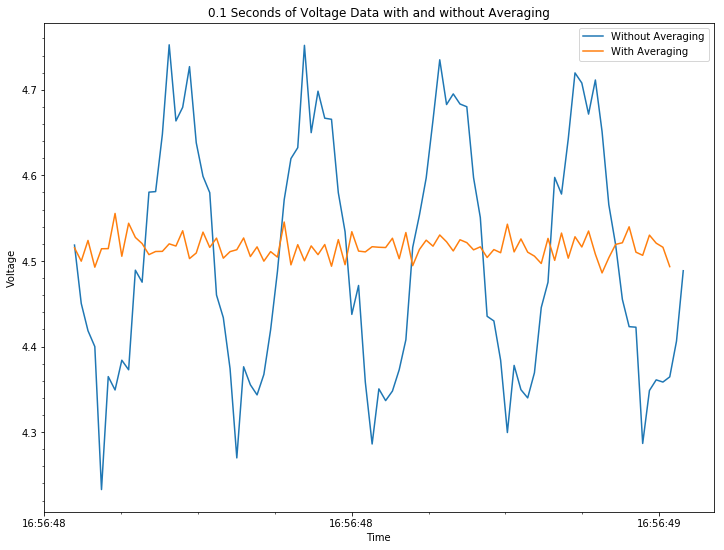

In [15]:
row_of_data = create_data_from_entry(0, data)
row_of_averaged_data = create_data_from_entry(0, rolling_averages)

fig = plt.figure(figsize=(12,9))
axis = fig.add_subplot(111)
axis.plot(row_of_data.loc[:90,"Datetime"], row_of_data.loc[:90, "Value"])
axis.plot(row_of_averaged_data["Datetime"], row_of_averaged_data["Value"])

axis.xaxis_date()
axis.minorticks_on()
axis.legend(["Without Averaging", "With Averaging"])

axis.set_title("0.1 Seconds of Voltage Data with and without Averaging")
axis.set_xlabel("Time")
axis.set_ylabel("Voltage")

Text(0,0.5,'Votlage')

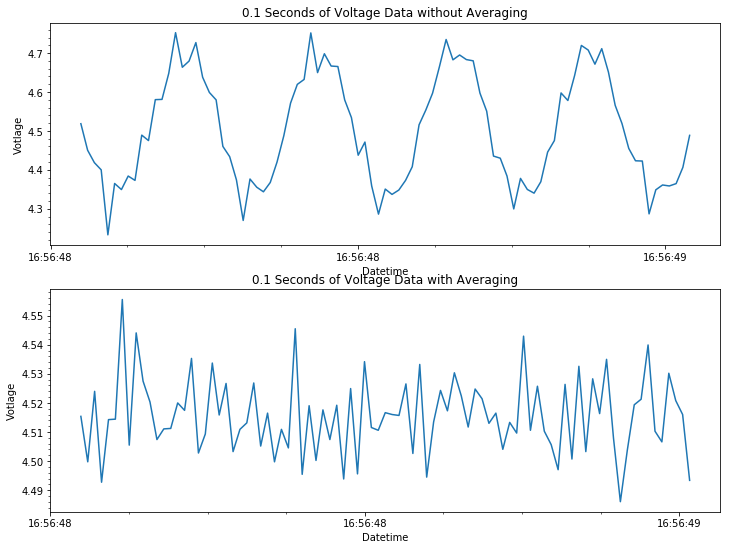

In [16]:
fig = plt.figure(figsize=(12,9))

axis1 = fig.add_subplot(211)
axis1.plot(row_of_data.loc[:90,"Datetime"], row_of_data.loc[:90, "Value"])
axis1.xaxis_date()
axis1.minorticks_on()
axis1.set_title("0.1 Seconds of Voltage Data without Averaging")
axis1.set_xlabel("Datetime")
axis1.set_ylabel("Votlage")

axis2 = fig.add_subplot(212)
axis2.plot(row_of_averaged_data["Datetime"], row_of_averaged_data["Value"])
axis2.xaxis_date()
axis2.minorticks_on()
axis2.set_title("0.1 Seconds of Voltage Data with Averaging")
axis2.set_xlabel("Datetime")
axis2.set_ylabel("Votlage")